# Práctica 5 - Redes Neuronales Convolucionales

## Ejercicio 1

La base de datos MNIST contiene imágenes de 28×28, en escala de grises, de números escritos a mano. Está conformada por 60.000 ejemplos de entrenamiento y 10.000 ejemplos de prueba.

<div style="text-align: center;">
    <img src='../../images/p5-ej1.png' width="40%">
</div>


Para cargar las imágenes utilice:

```python
from tensorflow.keras.datasets import mnist  
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
```

Puede visualizar una imagen utilizando:

```python
nImg = 0   # nro. de imagen a visualizar
plt.imshow(X_train[0, :,:], cmap='gray')
```

### a)

Con el conjunto de 60000 imágenes entrene una red neuronal convolucional para predecir el dígito presente en la imagen. Recuerde normalizar los valores de cada imagen. Salve el modelo para recuperarlo después.

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

2025-10-20 12:44:35.775893: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-20 12:44:35.785224: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 12:44:36.152803: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-20 12:44:38.112161: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


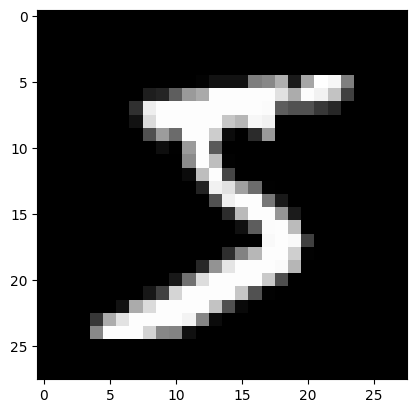

In [3]:
import matplotlib.pyplot as plt
nImg = 0 # nro. de imagen a visualizar
plt.imshow(X_train[0, :,:], cmap='gray')

#### Preprocesamiento

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import numpy as np

# Normalizar los datos
Y_train= to_categorical(np.array(Y_train))
Y_test = to_categorical(np.array(Y_test))

#### Crear el modelo

In [5]:
PADDING='same'
ACTIV='relu'

# dimension de las imagenes sacadas del primer ejmeplo
IMG_SHAPE = X_train[0].shape # (28,28)
TARGET_CNT= len(Y_train[0])  # 10 dígitos/clases

model = Sequential()

model.add(Input(shape=(*IMG_SHAPE, 1)))
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation=ACTIV, padding=PADDING ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation=ACTIV, padding=PADDING ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation=ACTIV, padding=PADDING ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation=ACTIV))
model.add(Dense(TARGET_CNT, activation='softmax'))

optimizer = optimizers.Adam(learning_rate=0.0001)
#optimizer = optimizers.RMSprop(learning_rate=0.0001)
#optimizer = optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'] )

model.summary()

2025-10-20 12:49:50.743267: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,114 (652.79 KB)

 Trainable params: 167,114 (652.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamiento

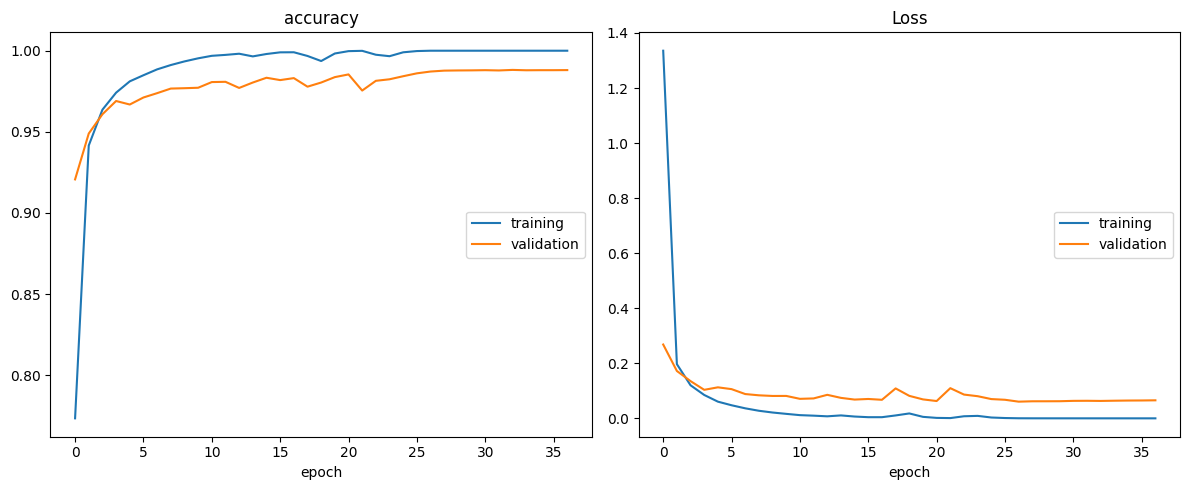

In [6]:
from livelossplot import PlotLossesKeras
from livelossplot.outputs import MatplotlibPlot

LOTES  = 128
EPOCAS = 100
PACIENCIA = 10

# parada temprana para evitar el sobreajuste
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=PACIENCIA, restore_best_weights=True )
visual_plot = PlotLossesKeras( outputs=[ MatplotlibPlot(figsize=(12, 5)) ] )

# %% Entrenamiento del modelo usando datos de entrenamiento y validacion
H = model.fit(x=X_train, y=Y_train, batch_size=LOTES,
				epochs=EPOCAS,
				validation_split=0.3,
				callbacks=[early_stop, visual_plot],
				verbose=0
				)

MODEL_DIR = '../../Models/p5/'
model.save(MODEL_DIR + 'ej1_mnist_model.keras')

In [7]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Crear subplots interactivos
fig = make_subplots(rows=1, cols=3,
                    subplot_titles=('Pérdida', 'Accuracy', 'Matriz de Confusión'),
                    )

# Gráfico de pérdida
fig.add_trace( go.Scatter(y=H.history["loss"], name="train_loss", mode='lines'),   row=1, col=1 )
fig.add_trace( go.Scatter(y=H.history["val_loss"], name="val_loss", mode='lines'), row=1, col=1 )

# Gráfico de accuracy
fig.add_trace( go.Scatter(y=H.history["accuracy"], name="train_acc", mode='lines'),   row=1, col=2)
fig.add_trace( go.Scatter(y=H.history["val_accuracy"], name="val_acc", mode='lines'), row=1, col=2)

# Matriz de confusión
pred = model.predict(X_train, verbose=0)
cm = metrics.confusion_matrix(np.argmax(Y_train, axis=1), np.argmax(pred, axis=1))

# Matriz de confusión con Plotly
confusion_heatmap = go.Heatmap(
    z=cm,
    x=[f'Pred {i}' for i in range(cm.shape[1])],
    y=[f'Real {i}' for i in range(cm.shape[0])],
    colorscale='Viridis',
    text=cm,
    texttemplate='%{text}',
    textfont={'size':10},
)

# Agregar la matriz de confusión
fig.add_trace(confusion_heatmap, row=1, col=3)

fig.update_layout(
    height=450,
    width=1200,
    title={
        'text': "Métricas de Entrenamiento",
        'font': dict(size=20),
        'y':0.95,
        'x':0.5,
        'xanchor': 'center'},
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=0.1,
        xanchor="center",
        x=0.57
    ),
    margin=dict(t=100, b=50, l=50, r=50)
)

fig.show()

# Resto del código para imprimir métricas
print("\nEfectividad del modelo con datos de entrenamiento: %6.2f%%" % (H.history['accuracy'][-1]*100))
print("Efectividad del modelo con datos de validación...: %6.2f%%" % (H.history['val_accuracy'][-1]*100))

# Evalua el modelo con datos de prueba
pred = model.evaluate(X_test, Y_test, verbose=0)
print("Efectividad del modelo con datos de Prueba.......: %6.2f%%\n" % (pred[1]*100))
pred = model.predict(X_test, verbose=0)
print(metrics.classification_report(np.argmax(Y_test, axis=1), np.argmax(pred, axis=1)))


Efectividad del modelo con datos de entrenamiento: 100.00%
Efectividad del modelo con datos de validación...:  98.81%
Efectividad del modelo con datos de Prueba.......:  98.84%

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### b)

Levante el modelo guardado en el punto a) y utilice la clase **DrawPanel** del módulo **utils.images** de la carpeta fuentes para generar un dibujo escrito a mano de un dígito y predecir la clase a la que pertenece.

Dibuja un dígito en la ventana que se abrirá...


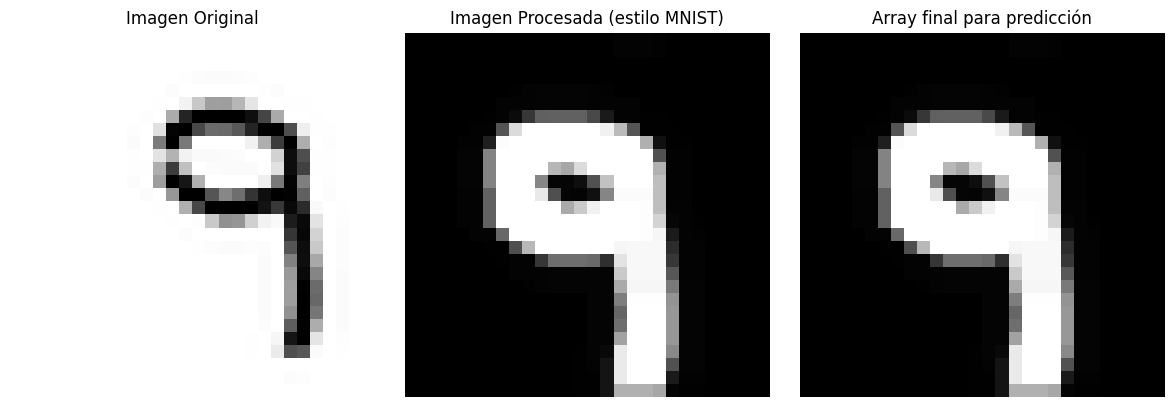


Probabilidades por dígito:
Dígito 0: 9.83%
Dígito 1: 9.70%
Dígito 2: 9.82%
Dígito 3: 10.28%
Dígito 4: 9.89%
Dígito 5: 9.95%
Dígito 6: 9.37%
Dígito 7: 10.17%
Dígito 8: 9.98%
Dígito 9: 11.01%

El dígito dibujado es: 9
Confianza: 11.01%


In [4]:
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from Fuentes.imagen import DrawPanel
from PIL import Image, ImageDraw, ImageOps, ImageChops, ImageFilter

def preprocess_mnist(pil_img):
    # 1. Asegurar modo L
    img = pil_img.convert('L')

    # 2. Invertir (MNIST fondo negro)
    img = ImageOps.invert(img)

    # 3. Filtrar para engrosar trazos (dilatación)
    img = img.filter(ImageFilter.MaxFilter(3))

    # 4. Centrar por centro de masa
    arr = np.array(img)
    total = arr.sum()
    if total > 0:
        coords = np.indices(arr.shape)
        cy = (coords[0] * arr).sum() / total
        cx = (coords[1] * arr).sum() / total
        shift_x = int(np.round(arr.shape[1]/2 - cx))
        shift_y = int(np.round(arr.shape[0]/2 - cy))
        img = ImageChops.offset(img, shift_x, shift_y)

    # 5. Normalizar a [0,1] y reshape
    arr = np.array(img).astype(np.float32) / 255.0
    arr = arr.reshape(1, 28, 28, 1)
    return arr, img

# Cargar el modelo
MODEL_DIR = '../../Models/p5/'
model = load_model(MODEL_DIR + 'ej1_mnist_model.keras')

# Crear panel de dibujo
IMG_SHAPE = (28, 28)
dp = DrawPanel()

# Generar imagen dibujada a mano
print("Dibuja un dígito en la ventana que se abrirá...")
image = dp.draw(size=IMG_SHAPE, line_width=2.0, scale=10)

# Preprocesar la imagen para que sea similar a MNIST
processed_array, processed_img = preprocess_mnist(image)

# Mostrar las imágenes
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Imagen original
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Imagen procesada
axes[1].imshow(processed_img, cmap='gray')
axes[1].set_title('Imagen Procesada (estilo MNIST)')
axes[1].axis('off')

# Imagen final para el modelo
axes[2].imshow(processed_array.reshape(28, 28), cmap='gray')
axes[2].set_title('Array final para predicción')
axes[2].axis('off')

plt.tight_layout()
plt.show()

# Realizar predicción
resp = model.predict(processed_array, verbose=0)

# Obtener la clase predicha
digito_predicho = np.argmax(resp)
confianza = np.max(resp) * 100

# Mostrar todas las probabilidades
print("\nProbabilidades por dígito:")
for i, prob in enumerate(resp[0]):
    print(f"Dígito {i}: {prob*100:.2f}%")

print(f"\n\033[1mEl dígito dibujado es: {digito_predicho}\033[0m")
print(f"Confianza: {confianza:.2f}%")
